Some description here in the future! <font color = 'red'> **Still heavily under construction** </font>

In [1]:
import boto3
import numpy as np
import pandas as pd
from io import StringIO
import plotly.plotly as py
import plotly.figure_factory as ff

Let's connect to S3 and grab the bucket that contains our data: 

In [2]:
s3 = boto3.client('s3')
bucket = 'personproject.b'

In [3]:
csv_obj = s3.get_object(Bucket=bucket, Key='cahsee2015.txt')
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')
df = pd.read_csv(StringIO(csv_string), sep = "\t", dtype={"CountyCode": object, "DistrictCode": object, "CharterNumber": object, "SchoolCode": object, "MathTestDate": object, "ELATestDate": object, 
                                                          "ELAPercentNotPassed": float, "GradeLevel": object})

In [4]:
cahsee_15 = df

Record Type: Classifies the level of data 
04=state, 05=county,06=district,07=school

SummaryType: Subgroup

I know I do not want to work with all the data, so I'll examine the columns and pick which ones I'm interested in working with.

In [5]:
cahsee_15.columns.values

array(['CountyCode', 'DistrictCode', 'CharterNumber', 'SchoolCode',
       'CountyName', 'DistrictName', 'SchoolName', 'RecordType',
       'SummaryType', 'Administration', 'MathTestDate',
       'MathGrade10AnswerSheetsProcessed', 'MathNumberTested',
       'MathNumberPassed', 'MathPercentPassed', 'MathNumberNotPassed',
       'MathPercentageNotPassed', 'MathMEanScaleScore',
       'MathPSPercentCorrect', 'MathNSPercentCorrect',
       'MathAFPercentCorrect', 'MathMGPercentCorrect',
       'MathA1PercentCorrect', 'ELATestDate',
       'ELAGrade10AnswerSheetsProcessed', 'ELANumberTested',
       'ELANumberPassed', 'ELAPercentPassed', 'ELANumberNotPassed',
       'ELAPercentNotPassed', 'ELAMeanScaleScore', 'ELAWAPercentCorrect',
       'ELARCPercentCorrect', 'ELALRAPercentCorrect',
       'ELAWSPercentCorrect', 'ELAWCPercentCorrect', 'ELAES1AvgScore',
       'Filler', 'SystemDate', 'GradeLevel', 'MathPercentProfAndAbove',
       'ELAPercentProfAndAbove', 'Unnamed: 42'], dtype=object)

In [6]:
cahsee_15.head(3)

,CountyCode,DistrictCode,CharterNumber,SchoolCode,CountyName,DistrictName,SchoolName,RecordType,SummaryType,Administration,...,ELALRAPercentCorrect,ELAWSPercentCorrect,ELAWCPercentCorrect,ELAES1AvgScore,Filler,SystemDate,GradeLevel,MathPercentProfAndAbove,ELAPercentProfAndAbove,Unnamed: 42
0,01,00000,000,0000000,Alameda County,,,5,1,S,...,53.0,43.0,55.0,2.0,0,07/28/15,12,0.0,0.0,NaN
1,01,00000,000,0000000,Alameda County,,,5,7,S,...,53.0,43.0,55.0,2.0,0,07/28/15,12,0.0,0.0,NaN
2,01,00000,000,0000000,Alameda County,,,5,8,S,...,52.0,43.0,56.0,2.1,0,07/28/15,12,0.0,0.0,NaN


In [7]:
cahsee_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715380 entries, 0 to 715379
Data columns (total 43 columns):
CountyCode                          715380 non-null object
DistrictCode                        715380 non-null object
CharterNumber                       715380 non-null object
SchoolCode                          715380 non-null object
CountyName                          715380 non-null object
DistrictName                        715380 non-null object
SchoolName                          715380 non-null object
RecordType                          715380 non-null int64
SummaryType                         715380 non-null int64
Administration                      715380 non-null object
MathTestDate                        634906 non-null object
MathGrade10AnswerSheetsProcessed    715380 non-null int64
MathNumberTested                    715380 non-null int64
MathNumberPassed                    715380 non-null int64
MathPercentPassed                   715380 non-null float64
MathNumb

In [8]:
cahsee_15 = cahsee_15[['CountyCode', 'DistrictCode', 'SchoolCode','CountyName','DistrictName', 'SchoolName', 'RecordType', 'SummaryType', 
    'MathGrade10AnswerSheetsProcessed','MathNumberTested', 'MathPercentPassed', 'MathPercentProfAndAbove', 
       'ELAGrade10AnswerSheetsProcessed', 'ELANumberTested', 'ELAPercentPassed', 'ELAPercentProfAndAbove']]

In [9]:
data_levels = {4: "state", 5: "county", 6: 'district', 7:'school'}

cahsee_15 = cahsee_15.replace({"RecordType": data_levels})

cahsee_15.head(5)

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,RecordType,SummaryType,MathGrade10AnswerSheetsProcessed,MathNumberTested,MathPercentPassed,MathPercentProfAndAbove,ELAGrade10AnswerSheetsProcessed,ELANumberTested,ELAPercentPassed,ELAPercentProfAndAbove
0,01,00000,0000000,Alameda County,,,county,1,0,188,18.0,0.0,0,227,22.0,0.0
1,01,00000,0000000,Alameda County,,,county,7,0,87,16.0,0.0,0,124,24.0,0.0
2,01,00000,0000000,Alameda County,,,county,8,0,101,19.0,0.0,0,103,20.0,0.0
3,01,00000,0000000,Alameda County,,,county,10,0,1,0.0,0.0,0,1,0.0,0.0
4,01,00000,0000000,Alameda County,,,county,11,0,17,29.0,0.0,0,49,14.0,0.0


I'm noticing the Percent Prof and Above columns are showing 0% for the first few rows. This appears odd to me as the 'Percent Passed' columns have non-zero values. I want to explore this further after routine data cleaning.

While the report uses dashes to represent suppressed data for number tested (n) <= 10, the file represents supressed data as 0's in the data rows. We'll manually suppress these rows and check the distribution of scores for the test levels.

In [10]:
cahsee_15.loc[cahsee_15['MathNumberTested'] <= 10, ['MathPercentProfAndAbove','MathPercentPassed']] = None
cahsee_15.loc[cahsee_15['ELANumberTested'] <= 10, ['ELAPercentProfAndAbove','ELAPercentPassed']] = None

In [11]:
state_level = cahsee_15.loc[cahsee_15['RecordType'] == 'state','MathPercentPassed']
county_level = cahsee_15.loc[cahsee_15['RecordType'] == 'county','MathPercentPassed']
district_level = cahsee_15.loc[cahsee_15['RecordType'] == 'district','MathPercentPassed']
school_level = cahsee_15.loc[cahsee_15['RecordType'] == 'school','MathPercentPassed']

In [12]:
test = cahsee_15.loc[cahsee_15['MathPercentPassed'] == 0.0, 'MathGrade10AnswerSheetsProcessed']

"In addition to the use of the CAHSEE as a graduation requirement, the CAHSEE
grade ten census administration is used in calculating the Academic Performance
Index for state accountability purposes and Adequate Yearly Progress (AYP) to
meet federal requirements."

In [13]:
cahsee_15 = (cahsee_15.query('MathGrade10AnswerSheetsProcessed > 0 & ELAGrade10AnswerSheetsProcessed > 0'))

In [14]:
state_level = cahsee_15.loc[cahsee_15['RecordType'] == 'state','MathPercentPassed']
county_level = cahsee_15.loc[cahsee_15['RecordType'] == 'county','MathPercentPassed']
district_level = cahsee_15.loc[cahsee_15['RecordType'] == 'district','MathPercentPassed']
school_level = cahsee_15.loc[cahsee_15['RecordType'] == 'school','MathPercentPassed']

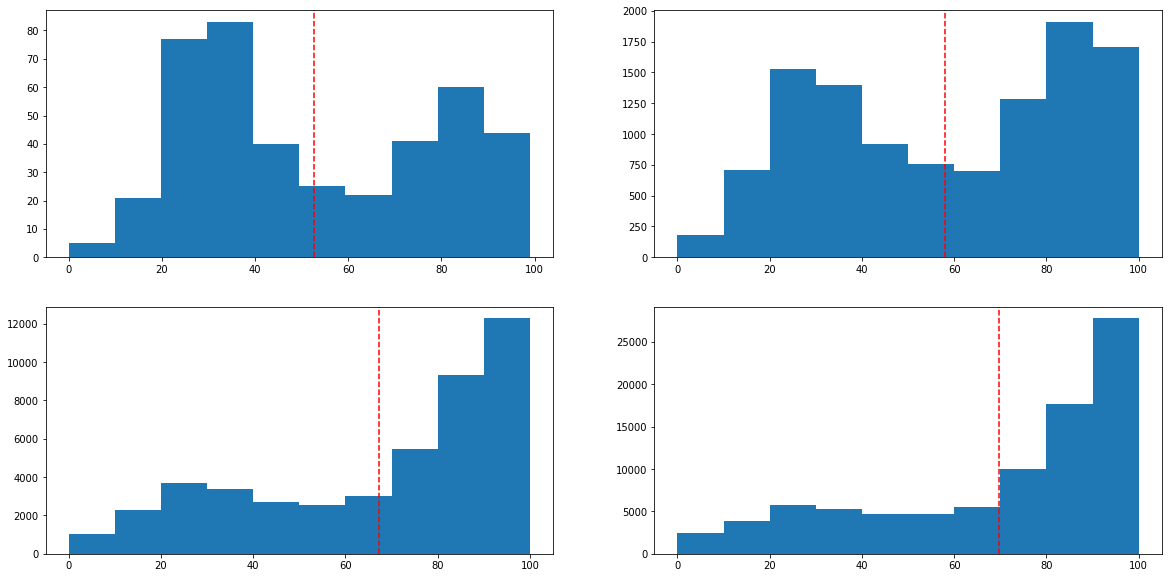

In [15]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(state_level[~np.isnan(state_level)])
plt.axvline(state_level.mean(), color = 'r', linestyle = 'dashed')
plt.subplot(222)
plt.hist(county_level[~np.isnan(county_level)])
plt.axvline(county_level.mean(), color = 'r', linestyle = 'dashed')
plt.subplot(223)
plt.hist(district_level[~np.isnan(district_level)])
plt.axvline(district_level.mean(), color = 'r', linestyle = 'dashed')
plt.subplot(224)
plt.hist(school_level[~np.isnan(school_level)])
plt.axvline(school_level.mean(), color = 'r', linestyle = 'dashed')

In [16]:
cahsee_15.loc[cahsee_15['RecordType'] == 'school'].groupby(by = 'CountyName').agg({'MathPercentPassed':'mean', 'ELAPercentPassed': 'mean'}).sort_values('ELAPercentPassed', ascending = False)

,MathPercentPassed,ELAPercentPassed
CountyName,,
Sierra County,97.947368,97.950000
Plumas County,93.479592,94.110000
Trinity County,91.733333,91.133333
Amador County,83.172043,84.370370
Tuolumne County,78.993197,83.716216
Placer County,81.601619,83.169245
Calaveras County,84.263636,83.077586
Shasta County,80.479661,82.690554
Modoc County,83.379310,82.339286


## Geographic Data

In [17]:
ca_directory = pd.read_table("./data/pubschls.txt", sep = "\t", dtype = {"CDSCode" : object, "NCESDist": object, "NCESSchool": object} )
ca_directory.columns.values

array(['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County',
       'District', 'School', 'Street', 'StreetAbr', 'City', 'Zip',
       'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip',
       'MailState', 'Phone', 'Ext', 'WebSite', 'OpenDate', 'ClosedDate',
       'Charter', 'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC',
       'SOCType', 'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName',
       'GSoffered', 'GSserved', 'Virtual', 'Magnet', 'Latitude',
       'Longitude', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2',
       'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3',
       'LastUpDate'], dtype=object)

In [18]:
cahsee_15['CDSCode'] = cahsee_15['CountyCode'] + cahsee_15['DistrictCode'] + cahsee_15['SchoolCode']
cahsee_15.loc[cahsee_15['SchoolName'] == 'Alameda High', 'CDSCode'].unique() == ca_directory.loc[ca_directory['School'] == 'Alameda High', 'CDSCode'].unique()

array([ True])

In [84]:
geo_cahsee_15 = pd.merge(cahsee_15, ca_directory.loc[:, ['CDSCode', 'Street', 'City', 'Zip','Latitude', 'Longitude']], 
                left_on = 'CDSCode', right_on = 'CDSCode', how = 'inner')
geo_cahsee_15.loc[geo_cahsee_15.Latitude == (geo_cahsee_15['Latitude'].max())]

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,RecordType,SummaryType,MathGrade10AnswerSheetsProcessed,MathNumberTested,...,ELAGrade10AnswerSheetsProcessed,ELANumberTested,ELAPercentPassed,ELAPercentProfAndAbove,CDSCode,Street,City,Zip,Latitude,Longitude
22774,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,1,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22775,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,7,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22776,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,14,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22777,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,19,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22778,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,25,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22779,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,35,2,2,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22780,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,1,2,4,...,2,5,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22781,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,7,2,4,...,2,5,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22782,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,11,2,1,...,2,1,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893
22783,08,10082,0106666,Del Norte County,Del Norte County Office of Edu,Bar-O,school,14,2,1,...,2,2,NaN,NaN,08100820106666,15005 Highway 199,Gasquet,95543,41.982874,-123.71893


## Visualizations

Now I'll move on to plotting the test scores on a map. To make the visualization most effective I need to limit the data to one level of granularity - displaying either  district level or school level data. Here one option isn't 'better' than another, it really depends on the type of question you're trying to answer. Plotting all the data at once is duplicative and makes the graph hard to visualize. I'm not performing an indepth analysis, but I am curious about the distribution of scores in relation to high income and metropolitan areas. In a future project pulling this data in could be interesting. For the sake of this visualization I'll plot district data.

### Matplotlib

I'm most familiar with matplotlib, so I'll start off using this library.

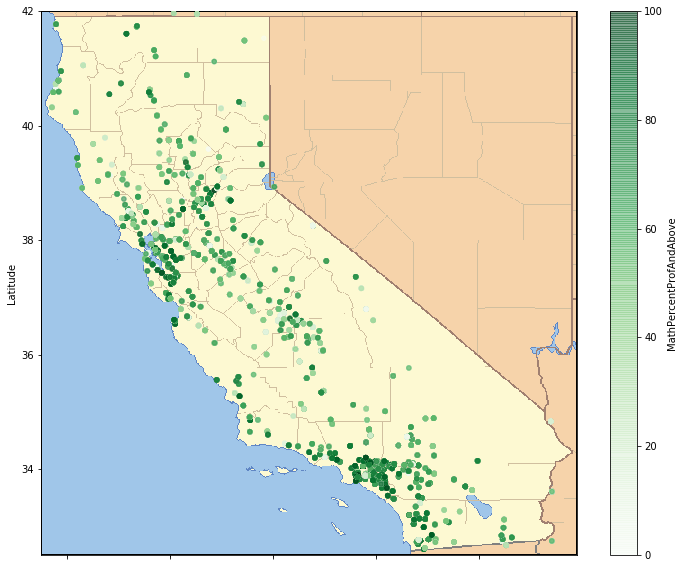

In [202]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

district_data = geo_cahsee_15.loc[geo_cahsee_15['RecordType'] == 'district']

img=mpimg.imread('california.png')

ax = district_data.plot(x='Longitude', y='Latitude', kind='scatter', alpha=0.5, 
         c= 'MathPercentProfAndAbove', cmap=plt.get_cmap("Greens"), colorbar=True, 
         zorder=5, figsize=(12,10) )

plt.imshow(img,aspect = 'auto',
          extent = [-124.5, -114.12, 32.51, 42.0])

plt.show()

### Plotly